# Absolute Chronologie

* 14C-Daten
    * [Datierungen Arbeitsgebiet Wotzka](#Datierungen-Arbeitsgebiet-Wotzka)
        * [Datierungen aus Wotzka 1995 ohne Hannover](#Datierungen-aus-Wotzka-1995-ohne-Hannover)
        * [Datierungen aus Hannover aus Wotzka 1995](#Datierungen-aus-Hannover-aus-Wotzka-1995)
        * [Datierungen nach 1995](#Datierungen-nach-1995)
        * [Zusammenfassung für CalPal](#Zusammenfassung-für-CalPal)
    * [Probleme mit Laboren](#Probleme-mit-Laboren)
    * [Datierungen für Stilgruppen](#Datierungen-für-Stilgruppen-im-Inneren-Kongobecken)
    * [nur publizierte Datierungen - ohne Poz u Beta](#nur-publizierte-Datierungen---ohne-Poz-u-Beta)
    * [nicht repräsentative Datierungen](#Anzahl-nicht-repräsentative-Datierungen)
* Keramik
    * [Gefäßformen](#Gefäßformen)
    * [Bodenformen](#Bodenformen)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

con = sqlite3.connect("../data/CongoDB.sqlite")

# Datierungen Arbeitsgebiet Wotzka
* bis 1995 (ohne Hannover-)
* bis 1995 (nur Hannover-)
* ab 1995

## Datierungen aus Wotzka 1995 ohne Hannover

In [2]:
sql = """SELECT
           t_14C.LABNR,
           t_14C.C14AGE,
           t_14C.C14STD,
           t_14C.C13,
           t_14C.MATERIAL,
           t_14C.SPECIES,
           [t_Ort].[ort_name] AS SITE, 
           [t_Komplex].[bef_art] AS CULTURE, 
           [t_Komplex].[bef_nr] AS PHASE,
           [t_ort].[ort_land] AS COUNTRY,
           [t_ort].[y_lat] AS LATITUDE,
           [t_ort].[x_long] AS LONGITUDE
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID
       WHERE (((t_14C.LIT) Like '%Wotzka%')
           AND ((t_14C.LABNR) Not Like '%Hv%'))
       ORDER BY t_14C.C14AGE DESC""".replace('\n',' ')

df1 = pd.read_sql(sql, con)
# display(df.head())
len(df1.index)

26

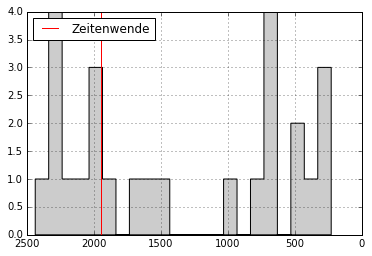

In [3]:
bins = df1['C14AGE'].max() - df1['C14AGE'].min()
df1['C14AGE'].hist(color = 'grey', bins = round(bins/100), histtype='stepfilled', fc='#CCCCCC').invert_xaxis()
plt.axvline(x = 1950, color='r', label = 'Zeitenwende')
legend = plt.legend(loc=2)
legend.get_frame().set_facecolor('white')

In [4]:
df1['CULTURE'] = '1995_ohneHv'
# df1

## Datierungen aus Hannover aus Wotzka 1995

In [5]:
sql = """SELECT
           t_14C.LABNR,
           t_14C.C14AGE,
           t_14C.C14STD,
           t_14C.C13,
           t_14C.MATERIAL,
           t_14C.SPECIES,
           [t_Ort].[ort_name] AS SITE, 
           [t_Komplex].[bef_art] AS CULTURE, 
           [t_Komplex].[bef_nr] AS PHASE,
           [t_ort].[ort_land] AS COUNTRY,
           [t_ort].[y_lat] AS LATITUDE,
           [t_ort].[x_long] AS LONGITUDE
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID
       WHERE (((t_14C.LIT) Like '%Wotzka%')
           AND ((t_14C.LABNR) Like '%Hv%'))
       ORDER BY t_14C.C14AGE DESC""".replace('\n',' ')

df2 = pd.read_sql(sql, con)
# display(df.head())
len(df2.index)

33

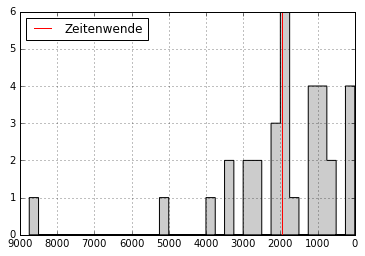

In [6]:
bins = df2['C14AGE'].max() - df2['C14AGE'].min()
df2['C14AGE'].hist(color = 'grey', bins = round(bins/250), histtype='stepfilled', fc='#CCCCCC').invert_xaxis()
plt.axvline(x = 1950, color='r', label = 'Zeitenwende')
legend = plt.legend(loc=2)
legend.get_frame().set_facecolor('white')

In [7]:
df2['CULTURE'] = '1995_Hv'
# df2

## Datierungen nach 1995

In [8]:
sql = """SELECT
           t_14C.LABNR,
           t_14C.C14AGE,
           t_14C.C14STD,
           t_14C.C13,
           t_14C.MATERIAL,
           t_14C.SPECIES,
           [t_Ort].[ort_name] AS SITE, 
           [t_Komplex].[bef_art] AS CULTURE, 
           [t_Komplex].[bef_nr] AS PHASE,
           [t_ort].[ort_land] AS COUNTRY,
           [t_ort].[y_lat] AS LATITUDE,
           [t_ort].[x_long] AS LONGITUDE,
           t_14C.Lit as Lit
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID
       WHERE (((t_Ort.ort_lit) Like '%Wotzka%'))
       ORDER BY t_14C.C14AGE DESC""".replace('\n',' ')

df3 = pd.read_sql(sql, con)
# display(df.head())
df3['Lit'] = df3['Lit'].fillna(value='(?)')

df3 = df3[~df3['Lit'].str.contains("Wotzka")]
len(df3.index)

48

In [9]:
df3['CULTURE'] = 'nach1995'
# df3

## Zusammenfassung für CalPal

In [10]:
df = pd.concat([df1, df2, df3])
df.to_excel('../data/processed/InnerCongoBasin_14C-Datierungen.xls', index = False)

In [11]:
df.pivot_table(values = 'LABNR', index = ['CULTURE'], aggfunc = len)

CULTURE
1995_Hv        33
1995_ohneHv    26
nach1995       48
Name: LABNR, dtype: int64

## Probleme mit Laboren
Datierungen aus der Arbeit von Wotzka

In [2]:
sql = """SELECT
           t_14C.LABNR,
           t_14C.C14AGE,
           t_14C.C14STD,
           t_14C.C13,
           t_14C.MATERIAL,
           [t_14C].[Bemerkungen] AS SPECIES,
           [t_Ort].[ort_name] AS SITE, 
           [t_Komplex].[bef_art] AS CULTURE, 
           [t_Komplex].[bef_nr] AS PHASE,
           [t_ort].[ort_land] AS COUNTRY,
           [t_ort].[y_lat] AS LATITUDE,
           [t_ort].[x_long] AS LONGITUDE
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID
       WHERE (((t_14C.LIT) Like '%Wotzka%'))
       ORDER BY t_14C.C14AGE DESC""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())
len(df.index)

59

In [13]:
df1 = df['LABNR'].str.split('-', expand = True).astype(str)
df1 = df1.reset_index()
df2 = pd.concat([df, df1], axis=1)
df2 = df2.rename(columns={0: 'LAB'})
df2['SPECIES'] = df2['SPECIES'].replace(np.nan, 'repräsentativ')

In [14]:
df2.pivot_table(values = 'index', index = 'SPECIES', columns = 'LAB', aggfunc = len, margins = True)

LAB,GrN,Hv,KI,KN,All
SPECIES,,,,,
nicht repäsentativ,2.0,19.0,1.0,2.0,24.0
repräsentativ,8.0,14.0,11.0,2.0,35.0
All,10.0,33.0,12.0,4.0,59.0


## Vierfeldertest

In [14]:
df.loc[df['LABNR'].str.contains("Hv"), 'Labor'] = 'Hannover'
df.loc[~df['LABNR'].str.contains("Hv"), 'Labor'] = 'Sonstige'
df['SPECIES'] = df['SPECIES'].replace(np.nan, 'repräsentativ')

In [23]:
df_pivot = df.pivot_table(values = 'C14AGE', index = 'Labor', columns = 'SPECIES', aggfunc = len).reset_index()
df_pivot.to_csv('../lit/Wotzka1995_14C-Repres_Vierfelder.csv', index=False)
df_pivot.to_latex('../lit/Wotzka1995_14C-Repres_Vierfelder.tex', index=False)

df_pivot

SPECIES,Labor,nicht repräsentativ,repräsentativ
0,Hannover,20,13
1,Sonstige,4,22


## Datierungen für Stilgruppen im Inneren Kongobecken

In [15]:
sql = """SELECT
           t_14C.LABNR,
           t_14C.C14AGE,
           t_14C.C14STD,
           t_14C.C13,
           t_14C.MATERIAL,
           [t_14C].[Bemerkungen] AS SPECIES,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS SITE,
           [t_14C].[CULTURE] AS CULTURE, 
           [t_Komplex].[bef_nr] AS PHASE,
           [t_ort].[ort_land] AS COUNTRY,
           [t_ort].[y_lat] AS LATITUDE,
           [t_ort].[x_long] AS LONGITUDE
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID
       WHERE (((t_14C.CULTURE) Like '%Gruppe%'))
       ORDER BY t_14C.C14AGE DESC""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

df = df.fillna(value='?')

# nicht-repräsentative Daten herausfiltern
df = df[~df['SPECIES'].str.contains("nicht")]

len(df.index)

54

In [16]:
df.pivot_table(values = 'LABNR', index = 'CULTURE', aggfunc = len)

CULTURE
Bokuma-Lingonda-Gruppe     2
Bolondo-Gruppe             1
Bondongo-Gruppe            8
Botendo-Gruppe             6
Imbonga-Gruppe            28
Inganda-Gruppe             3
Lingonda-Gruppe            3
Monkoto-Gruppe             1
Nkile-/Bondongo-Gruppe     1
Pikunda-Munda-Gruppe       1
Name: LABNR, dtype: int64

In [17]:
df = df.sort_values(by = ['CULTURE', 'C14AGE'], ascending = False)
df

,LABNR,C14AGE,C14STD,C13,MATERIAL,SPECIES,SITE,CULTURE,PHASE,COUNTRY,LATITUDE,LONGITUDE
37,KI-2877,1980,100,-26.9,Charcoal,?,Pikunda (Fpl. 255),Pikunda-Munda-Gruppe,87/1,COG,0.549344,16.635736
61,Hv-8916,625,50,0.0,Charcoal,?,Nkile (Fpl. 17),Nkile-/Bondongo-Gruppe,1,COD,-0.111339,18.677862
38,Hv-12613,1920,90,0.0,Charcoal,?,Wafanya (Fpl. 58),Monkoto-Gruppe,83/16,COD,-1.354817,20.378778
43,GrN-14004,1670,70,0.0,Charcoal,?,Bokuma (Fpl. 18),Lingonda-Gruppe,83/3,COD,-0.114356,18.697792
44,KN-4206,1590,60,0.0,Charcoal,?,Isaka-Elinga (Fpl. 80),Lingonda-Gruppe,83/104,COD,-0.666969,20.202048
46,GrN-13076,1450,45,0.0,Charcoal,?,Isaka-Elinga (Fpl. 80),Lingonda-Gruppe,83/104,COD,-0.666969,20.202048
33,GrN-14003,2090,70,0.0,Charcoal,?,Bokuma (Fpl. 18),Inganda-Gruppe,83/2,COD,-0.114356,18.697792
35,KI-2433,2025,75,-25.5,Charcoal,?,Bokuma (Fpl. 18),Inganda-Gruppe,83/2,COD,-0.114356,18.697792
36,KI-2432,2020,100,-27.1,Charcoal,?,Bokuma (Fpl. 18),Inganda-Gruppe,83/2,COD,-0.114356,18.697792
5,GrN-14005,2440,150,0.0,Charcoal,?,Boso-Njafo (Fpl. 149),Imbonga-Gruppe,85/1,COD,1.130547,19.209599


In [18]:
print('''Plot()
{''')
for index, row in df.iterrows():
    print('R_Date("', row['SITE'],'-', row['LABNR'],'",', row['C14AGE'],',', row['C14STD'],');')
print('};')

Plot()
{
R_Date(" Pikunda (Fpl. 255) - KI-2877 ", 1980 , 100 );
R_Date(" Nkile (Fpl. 17) - Hv-8916 ", 625 , 50 );
R_Date(" Wafanya (Fpl. 58) - Hv-12613 ", 1920 , 90 );
R_Date(" Bokuma (Fpl. 18) - GrN-14004 ", 1670 , 70 );
R_Date(" Isaka-Elinga (Fpl. 80) - KN-4206 ", 1590 , 60 );
R_Date(" Isaka-Elinga (Fpl. 80) - GrN-13076 ", 1450 , 45 );
R_Date(" Bokuma (Fpl. 18) - GrN-14003 ", 2090 , 70 );
R_Date(" Bokuma (Fpl. 18) - KI-2433 ", 2025 , 75 );
R_Date(" Bokuma (Fpl. 18) - KI-2432 ", 2020 , 100 );
R_Date(" Boso-Njafo (Fpl. 149) - GrN-14005 ", 2440 , 150 );
R_Date(" Bokele (Fpl. 14) - GrN-13583 ", 2290 , 70 );
R_Date(" Iyonda (Fpl. 8) - Poz-74885 ", 2290 , 30 );
R_Date(" Boso-Njafo (Fpl. 149) - KI-2439 ", 2270 , 70 );
R_Date(" Mobaka (Fpl. 246) - KI-2894 ", 2270 , 160 );
R_Date(" Boso-Njafo (Fpl. 149) - GrN-14006 ", 2260 , 80 );
R_Date(" Bokuma (Fpl. 18) - KI-2363 ", 2260 , 60 );
R_Date(" Iyonda (Fpl. 8) - Poz-74898 ", 2235 , 30 );
R_Date(" Mitula (Fpl. 251) - KI-2895 ", 2230 , 100 );
R_Dat

## nur publizierte Datierungen - ohne Poz u Beta

Anzahl Datierungen in Wotzka 1995:

In [19]:
sql = """SELECT
           t_14C.LABNR
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID
       WHERE ((t_14C.lit) Like '%Wotzka%')""".replace('\n',' ')

df = pd.read_sql(sql, con)

len(df.index)

59

nur repsäentative und publizierte Datierungen:

In [20]:
sql = """SELECT
           t_14C.LABNR,
           t_14C.C14AGE,
           t_14C.C14STD,
           t_14C.C13,
           t_14C.MATERIAL,
           [t_14C].[Bemerkungen] AS SPECIES,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS SITE,
           [t_14C].[CULTURE] AS CULTURE, 
           [t_Komplex].[bef_nr] AS PHASE,
           [t_ort].[ort_land] AS COUNTRY,
           [t_ort].[y_lat] AS LATITUDE,
           [t_ort].[x_long] AS LONGITUDE,
           t_14C.Lit
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID
       WHERE (((t_14C.CULTURE) Like '%Gruppe%')
           AND ((t_14C.LABNR) Not Like '%Poz%')
           AND ((t_14C.LABNR) Not Like '%Beta%'))
       ORDER BY t_14C.C14AGE DESC""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

df = df.fillna(value='?')

# nicht-repräsentative Daten herausfiltern
df = df[~df['SPECIES'].str.contains("nicht")]

len(df.index)

29

In [21]:
df.pivot_table(values = 'LABNR', index = 'Lit', aggfunc = len)

Lit
Eggert 1993                        2
Eggert 1993; Wotzka 1995: 66-67    1
Kahlheber 2014                     1
Wotzka 1995                        1
Wotzka 1995: 115                   3
Wotzka 1995: 138                   8
Wotzka 1995: 138, 171-172          1
Wotzka 1995: 158                   2
Wotzka 1995: 180-181               1
Wotzka 1995: 66-67                 5
Wotzka 1995: 84                    3
Wotzka 1995: 99                    1
Name: LABNR, dtype: int64

In [22]:
df.pivot_table(values = 'LABNR', index = 'CULTURE', aggfunc = len)

CULTURE
Bolondo-Gruppe            1
Bondongo-Gruppe           8
Botendo-Gruppe            2
Imbonga-Gruppe            9
Inganda-Gruppe            3
Lingonda-Gruppe           3
Monkoto-Gruppe            1
Nkile-/Bondongo-Gruppe    1
Pikunda-Munda-Gruppe      1
Name: LABNR, dtype: int64

In [23]:
print('''Plot()
{''')
for index, row in df.iterrows():
    print('R_Date("', row['SITE'],'-', row['LABNR'],'",', row['C14AGE'],',', row['C14STD'],');')
print('};')

Plot()
{
R_Date(" Boso-Njafo (Fpl. 149) - GrN-14005 ", 2440 , 150 );
R_Date(" Bokele (Fpl. 14) - GrN-13583 ", 2290 , 70 );
R_Date(" Boso-Njafo (Fpl. 149) - KI-2439 ", 2270 , 70 );
R_Date(" Mobaka (Fpl. 246) - KI-2894 ", 2270 , 160 );
R_Date(" Boso-Njafo (Fpl. 149) - GrN-14006 ", 2260 , 80 );
R_Date(" Bokuma (Fpl. 18) - KI-2363 ", 2260 , 60 );
R_Date(" Mitula (Fpl. 251) - KI-2895 ", 2230 , 100 );
R_Date(" Boso-Njafo (Fpl. 149) - Erl-17763 ", 2201 , 52 );
R_Date(" Imbonga (Fpl. 43) - KI-2428 ", 2160 , 90 );
R_Date(" Bokuma (Fpl. 18) - GrN-14003 ", 2090 , 70 );
R_Date(" Bokuma (Fpl. 18) - KI-2433 ", 2025 , 75 );
R_Date(" Bokuma (Fpl. 18) - KI-2432 ", 2020 , 100 );
R_Date(" Pikunda (Fpl. 255) - KI-2877 ", 1980 , 100 );
R_Date(" Wafanya (Fpl. 58) - Hv-12613 ", 1920 , 90 );
R_Date(" Bokuma (Fpl. 18) - GrN-14004 ", 1670 , 70 );
R_Date(" Isaka-Elinga (Fpl. 80) - KN-4206 ", 1590 , 60 );
R_Date(" Isaka-Elinga (Fpl. 80) - GrN-13076 ", 1450 , 45 );
R_Date(" Baringa (Fpl. 161) - KI-2431 ", 950 , 70

Reproduktion der Liste von Seite 412 aus Wotzka 1995 mit den Angaben zur Repräsentativität:

In [24]:
sql = """SELECT
           't_Ort'.'ort_name' AS Fundort,
           't_ort'.'Kat-Nr' AS 'Fpl.',
           't_Ort'.'ort_kurz' || ' ' || 't_Komplex'.'bef_nr' AS Befund,
           t_14C.LABNR AS 'Labor-Nr.',
           't_14C'.'C14AGE' || ' \( \pm \) ' || 't_14C'.'C14STD' || ' bp' AS Radiokarbonalter,
           [t_14C].[CULTURE] AS 'Assoziierte Stilgruppe', 
           [t_14C].[Bemerkungen] AS Repräsentativität,
           t_14C.Lit AS 'Literatur'
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID
       WHERE (((t_14C.lit) Like '%Wotzka%')
           AND ((t_14C.LABNR) Not Like '%Poz%')
           AND ((t_14C.LABNR) Not Like '%Beta%'))
       ORDER BY t_14C.C14AGE DESC""".replace('\n',' ')

df = pd.read_sql(sql, con)
df = df.fillna(value='')
df.to_latex('../output/tabs/4-2-1_Wotzka1995-412_Tab_14Cdatings_Representative.tex', longtable = True, index = False, escape = False, encoding='utf8')
# len(df.index)
df

,Fundort,Fpl.,Befund,Labor-Nr.,Radiokarbonalter,Assoziierte Stilgruppe,Repräsentativität,Literatur
0,Iyonda,8,IYO 81/2,Hv-12204,8750 \( \pm \) 205 bp,,nicht repäsentativ,Wotzka 1995
1,Bamanya,12,BAM 83/2,Hv-12616,5245 \( \pm \) 695 bp,,nicht repäsentativ,Wotzka 1995
2,Imbonga,43,IMB 81/9,Hv-11574,3775 \( \pm \) 105 bp,Imbonga-Gruppe,nicht repäsentativ,Wotzka 1995: 66-67
3,Bokuma,18,BOK 83/1,Hv-12627,3485 \( \pm \) 220 bp,Imbonga-Gruppe,nicht repäsentativ,Wotzka 1995: 66-67
4,Wafanya,58,WAF 83/16,Hv-12612,3305 \( \pm \) 250 bp,,nicht repäsentativ,Wotzka 1995
5,Imbonga,43,IMB 81/3,Hv-11576,2900 \( \pm \) 285 bp,,nicht repäsentativ,Wotzka 1995
6,Imbonga,43,IMB 81/1,Hv-12207,2860 \( \pm \) 280 bp,Monkoto-Gruppe,nicht repäsentativ,Wotzka 1995: 99
7,Wafanya,58,WAF 83/16,Hv-12611,2695 \( \pm \) 160 bp,Monkoto-/Longa-Gruppe,nicht repäsentativ,"Wotzka 1995: 99, 127"
8,Imbonga,43,IMB 83/1,Hv-12614,2665 \( \pm \) 110 bp,Monkoto-Gruppe,nicht repäsentativ,Wotzka 1995: 99
9,Boso-Njafo,149,BSN 85/1,GrN-14005,2440 \( \pm \) 150 bp,Imbonga-Gruppe,,Wotzka 1995: 66-67


### Anzahl nicht-repräsentative Datierungen

In [26]:
sql = """SELECT
           t_14C.LABNR
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID
       WHERE ((t_14C.Bemerkungen) Like '%Nicht%')""".replace('\n',' ')

df = pd.read_sql(sql, con)

len(df.index)

24

In [45]:
df1 = df['LABNR'].str.split('-', expand = True).astype(str)
df1 = df1.rename(columns={0: 'LAB'})
#df2['SPECIES'] = df2['SPECIES'].replace(np.nan, 'repräsentativ')
df1 = df1.reset_index()
df1.pivot_table(values = 'index', index = 'LAB', aggfunc = len)

LAB
GrN     2
Hv     19
KI      1
KN      2
Name: index, dtype: int64

## Gefäßformen

In [6]:
df = pd.read_csv("../lit/Wotzka1995_GefFormenAnzahl.csv", encoding='Latin1')
display(df.head(2))

,StilGr,GefForm,Anzahl,Wotzka1995,lokalerName
0,BDG,46,2,128 Tab. 55,NaN
1,BDG,48,1,128 Tab. 55,NaN


In [7]:
stilgr = pd.read_csv("../lit/Wotzka1995_StilGrKuerzel.csv", encoding='latin1', converters={'Wotzka1995': str, 'Seidensticker': str, 'Lit': str})
stilgr['STILGR'] = stilgr['Wotzka1995']+ ' ' + stilgr['Stilgruppe']
# dictionary der Stilgruppen-Kürzel und Stilgruppen
di = stilgr.set_index('Typ').to_dict()['STILGR']
#di

In [8]:
df = df.replace({"StilGr": di})
# zerschnibbeln für Sortieurng
df['Nr'] = df['StilGr'].apply(lambda x: x.split(' ')[0])
df['Stil'] = df['StilGr'].apply(lambda x: x.split(' ')[-1])
df['A'], df['B'] = df['Nr'].str.split('.', 1).str
df['A'] = pd.to_numeric(df['A'], errors='coerce')
df['B'] = pd.to_numeric(df['B'], errors='coerce')

In [9]:
df_pivot = df.pivot_table(values='Anzahl', index=['A', 'B', 'StilGr'], columns='GefForm')
#df_pivot = df_pivot.reset_index()

df_pivot = df_pivot.reset_index()
df_pivot = df_pivot.drop('A', axis = 1)
df_pivot = df_pivot.drop('B', axis = 1)

df_pivot.to_csv("../data/processed/Wotzka1995_GefFormen_Pivot.csv", index=False)

df_pivot.head(2)

GefForm,StilGr,1,2,3,4,5,6,7,8,9,...,104,105,106,108,110,111,112,113,114,115
0,7.1 Imbonga,166.0,9.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.2 Bonkake,NaN,NaN,4.0,1.0,22.0,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df['GefForm'] = pd.to_numeric(df['GefForm'])
df.head(2)

,StilGr,GefForm,Anzahl,Wotzka1995,lokalerName,Nr,Stil,A,B
0,7.13 Bondongo,46,2,128 Tab. 55,NaN,7.13,Bondongo,7,13
1,7.13 Bondongo,48,1,128 Tab. 55,NaN,7.13,Bondongo,7,13


In [11]:
c = pd.read_csv("../lit/Wotzka1995_GefFormenKonkordanz.csv")
c.head(2)

,TypHPW,TypDS,Wotzka1995,Notiz
0,1,C1,60,od C2
1,2,I2,61,NaN


In [12]:
df_map = pd.merge(left = df, right = c, left_on=['GefForm'], right_on=['TypHPW'], how='inner')
df_map.head(2)

,StilGr,GefForm,Anzahl,Wotzka1995_x,lokalerName,Nr,Stil,A,B,TypHPW,TypDS,Wotzka1995_y,Notiz
0,7.13 Bondongo,46,2,128 Tab. 55,NaN,7.13,Bondongo,7,13,46,J1,122,NaN
1,7.12 Longa,46,6,121 Tab. 50,NaN,7.12,Longa,7,12,46,J1,122,NaN


In [13]:
df_pivot = df_map.pivot_table(values='Anzahl', index=['A', 'B', 'StilGr'], columns='TypDS', aggfunc = sum)
#df_pivot = df_pivot.reset_index()

df_pivot = df_pivot.reset_index()
df_pivot = df_pivot.drop('A', axis = 1)
df_pivot = df_pivot.drop('B', axis = 1)

df_pivot.to_csv("../data/processed/Wotzka1995_GefFormen_Pivot_mapDS.csv", index=False)

df_pivot.head(2)

TypDS,StilGr,A2,A?,B1,B2,B3,B4,B6,C1,C2,...,G1,G3,G4,G6,H1,H2,I1,I2,I4,J1
0,7.1 Imbonga,NaN,NaN,4.0,NaN,NaN,NaN,NaN,175.0,NaN,...,NaN,NaN,NaN,NaN,2.0,3.0,3.0,10.0,NaN,4.0
1,7.2 Bonkake,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0


In [14]:
HPWneu = df_map

## Kombination HPWneu & DS

In [15]:
sql = """SELECT 
            t_Obj.objID,
            t_Obj.Typ, 
            t_Obj.Form_Gef,
            t_Obj.Anzahl
            FROM t_Obj INNER JOIN t_Komplex ON t_Obj.komplexID = t_Komplex.komplexID INNER JOIN t_Ort ON t_Komplex.ortID = t_Ort.ortID 
            WHERE (((t_Ort.ort_lit) = 'DS')
            AND ((t_Obj.Typ) != '')
            AND ((t_Obj.Typ) Not Like '%(?)%')
            AND ((t_Obj.Typ) Not Like '%/%')
            AND ((t_Obj.Form_Gef) != '')
            AND ((t_Obj.Form_Gef) Not Like '%(?)%')
            AND ((t_Obj.Form_Gef) Not Like '%/%')
            AND ((t_Obj.Anzahl) != ''))""".replace('\n',' ')

DS = pd.read_sql(sql, con)

stilgr = pd.read_csv("../lit/Wotzka1995_StilGrKuerzel.csv", encoding='latin1', converters={'Wotzka1995': str, 'Seidensticker': str, 'Lit': str})
stilgr['STILGR'] = stilgr['Seidensticker']+ ' ' + stilgr['Stilgruppe']
# dictionary der Stilgruppen-Kürzel und Stilgruppen
di = stilgr.set_index('Typ').to_dict()['STILGR']

DS = DS.replace({"Typ": di})

DS.head(2)

,objID,Typ,Form_Gef,Anzahl
0,68,3.2.1.4 Bokwango,E1,1
1,70,3.3.1.4 Botendo,I3,1


In [16]:
DS_pivot = DS.pivot_table(values='objID', index=['Typ'], columns='Form_Gef', aggfunc = len)
DS_pivot = DS_pivot.reset_index()
DS_pivot.to_csv("../data/processed/Wotzka1995_GefFormen_Pivot_Seidensticker.csv", index=False)
DS_pivot.head()

Form_Gef,Typ,A2,A3,B1,B2,B3,B4,B5,B6,B7,...,G3,G4,G6,H1,H2,I1,I2,I3,I4,J1
0,3.2.1.1 Batalimo-Maluba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,3.2.1.10 Motengo-Boma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,3.0,NaN,6.0,5.0,NaN
2,3.2.1.11 Bangui,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.2.1.2 Ngbanja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.2.1.3 Mokelo,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN


In [17]:
HPWneu['SOURCE'] = 'Wotzka 1995'
HPWneu.head()

,StilGr,GefForm,Anzahl,Wotzka1995_x,lokalerName,Nr,Stil,A,B,TypHPW,TypDS,Wotzka1995_y,Notiz,SOURCE
0,7.13 Bondongo,46,2,128 Tab. 55,NaN,7.13,Bondongo,7,13,46,J1,122,NaN,Wotzka 1995
1,7.12 Longa,46,6,121 Tab. 50,NaN,7.12,Longa,7,12,46,J1,122,NaN,Wotzka 1995
2,7.13 Bondongo,48,1,128 Tab. 55,NaN,7.13,Bondongo,7,13,48,F4,122,NaN,Wotzka 1995
3,7.12 Longa,48,3,121 Tab. 50,NaN,7.12,Longa,7,12,48,F4,122,NaN,Wotzka 1995
4,7.13 Bondongo,53,281,128 Tab. 55,NaN,7.13,Bondongo,7,13,53,C2,128f.,NaN,Wotzka 1995


In [18]:
DS['SOURCE'] = 'Seidensticker'
DS = DS.rename(columns={'Typ':'StilGr', 'Form_Gef':'TypDS'})
DS['Anzahl'] = DS['Anzahl'].astype(int)
DS.head()

,objID,StilGr,TypDS,Anzahl,SOURCE
0,68,3.2.1.4 Bokwango,E1,1,Seidensticker
1,70,3.3.1.4 Botendo,I3,1,Seidensticker
2,89,3.2.1.9 Dama,D1,1,Seidensticker
3,90,3.2.1.9 Dama,D1,1,Seidensticker
4,94,3.2.1.1 Batalimo-Maluba,C2,1,Seidensticker


In [19]:
ALL = pd.concat([HPWneu, DS])
ALL = ALL[['StilGr', 'TypDS', 'SOURCE', 'Anzahl']]
ALL.head()

,StilGr,TypDS,SOURCE,Anzahl
0,7.13 Bondongo,J1,Wotzka 1995,2
1,7.12 Longa,J1,Wotzka 1995,6
2,7.13 Bondongo,F4,Wotzka 1995,1
3,7.12 Longa,F4,Wotzka 1995,3
4,7.13 Bondongo,C2,Wotzka 1995,281


In [20]:
ALL_pivot = ALL.pivot_table(values='Anzahl', index=['StilGr'], columns='TypDS', aggfunc = sum)
ALL_pivot = ALL_pivot.reset_index()
ALL_pivot.to_csv("../data/processed/Wotzka1995_GefFormen_Pivot_ALL.csv", index=False)
ALL_pivot.head()

TypDS,StilGr,A2,A3,A?,B1,B2,B3,B4,B5,B6,...,G3,G4,G6,H1,H2,I1,I2,I3,I4,J1
0,3.2.1.1 Batalimo-Maluba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,3.2.1.10 Motengo-Boma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,3.0,NaN,6.0,7.0,NaN
2,3.2.1.11 Bangui,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.2.1.2 Ngbanja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.2.1.3 Mokelo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN


> CA in R

## Bodenformen

In [2]:
df = pd.read_csv("../lit/Wotzka1995_StilGr-Bodentypen.csv", index_col = 0)
display(df.head())

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,Wotzka 1995
StilGr,,,,,,,,,,,,,,,
IMB,NaN,NaN,NaN,222.0,NaN,7.0,NaN,4.0,NaN,NaN,74.0,8.0,1.0,NaN,63 Tab. 7
BON,NaN,NaN,NaN,9.0,NaN,1.0,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,70 Tab. 13
ING,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,75 Tab. 17
IGD,NaN,NaN,NaN,13.0,1.0,NaN,NaN,NaN,NaN,NaN,7.0,1.0,NaN,NaN,80 Tab. 21
LOK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,86


In [3]:
# Spalten als numeric
df = df[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14']].convert_objects(convert_numeric=True)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [4]:
df_perc = df.divide(df.sum(axis=1), axis=0)
display(df_perc.head())

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14
StilGr,,,,,,,,,,,,,,
IMB,NaN,NaN,NaN,0.702532,NaN,0.022152,NaN,0.012658,NaN,NaN,0.234177,0.025316,0.003165,NaN
BON,NaN,NaN,NaN,0.600000,NaN,0.066667,NaN,NaN,NaN,0.066667,0.266667,NaN,NaN,NaN
ING,NaN,NaN,NaN,0.846154,NaN,NaN,NaN,NaN,NaN,NaN,0.153846,NaN,NaN,NaN
IGD,NaN,NaN,NaN,0.590909,0.045455,NaN,NaN,NaN,NaN,NaN,0.318182,0.045455,NaN,NaN
LOK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


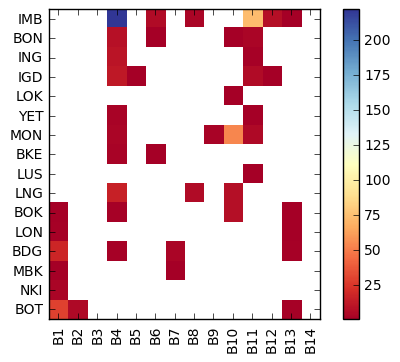

In [5]:
#fig = plt.figure(1)
#fig.set_size_inches(5, 7.5)
plt.imshow(df, interpolation='nearest', cmap='RdYlBu')
plt.yticks(range(len(df.index)), df.index)
plt.xticks(range(len(df.columns)), df.columns, rotation='vertical')
plt.colorbar()
plt.show()

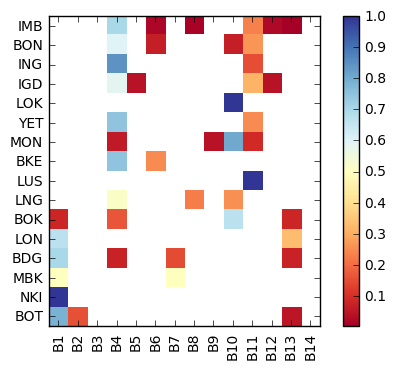

In [6]:
#fig = plt.figure(1)
#fig.set_size_inches(5, 7.5)
plt.imshow(df_perc, interpolation='nearest', cmap='RdYlBu')
plt.yticks(range(len(df_perc.index)), df_perc.index)
plt.xticks(range(len(df_perc.columns)), df_perc.columns, rotation='vertical')
plt.colorbar()
plt.show()

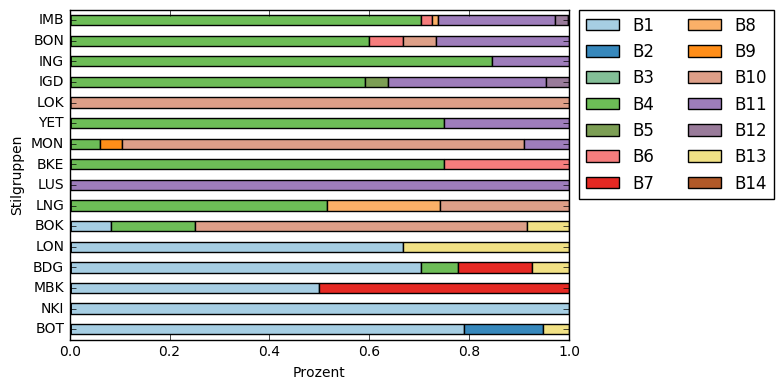

In [7]:
df_perc.plot(kind = 'barh', stacked=True, cmap = 'Paired')
plt.xlabel('Prozent')
plt.ylabel('Stilgruppen')
plt.gca().invert_yaxis()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, ncol=2, borderaxespad = 0.)
plt.tight_layout()
plt.show()

Reduzierung auf rund *vs.* flachbodig

In [8]:
round_dict = {'B1', 'B2', 'B3'}
flat_dict = {'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14'}

In [9]:
a = df.unstack()
a = pd.DataFrame(a)
a = a.reset_index()
# alle Zeilen mit NaN raus
a = a[np.isfinite(a[0])]
#a.head()

In [10]:
a_round = a[a['level_0'].isin(round_dict)]
a_round['base'] = 'round'

a_flat = a[a['level_0'].isin(flat_dict)]
a_flat['base'] = 'flat'

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
stilgr = pd.read_csv("../lit/Wotzka1995_StilGrKuerzel.csv", encoding='latin1', converters={'Wotzka1995': str, 'Seidensticker': str, 'Lit': str})

stilgr['STILGR'] = stilgr['Wotzka1995']+ ' ' + stilgr['Stilgruppe']

# dictionary der Stilgruppen-Kürzel und Stilgruppen
di = stilgr.set_index('Typ').to_dict()['STILGR']
#di

In [12]:
a_bases = pd.concat([a_flat, a_round])

a_bases = a_bases.replace({"StilGr": di})

# zerschnibbeln für Sortieurng
a_bases['Nr'] = a_bases['StilGr'].apply(lambda x: x.split(' ')[0])
a_bases['Stil'] = a_bases['StilGr'].apply(lambda x: x.split(' ')[-1])

a_bases['A'], a_bases['B'] = a_bases['Nr'].str.split('.', 1).str

a_bases['A'] = pd.to_numeric(a_bases['A'], errors='coerce')
a_bases['B'] = pd.to_numeric(a_bases['B'], errors='coerce')

#a_bases.head()

In [13]:
df_pivot = a_bases.pivot_table(values = 0, index = ['A', 'B', 'Stil'], columns = ['base'], aggfunc = sum)

df_pivot['sum'] = df_pivot.sum(axis=1)
df_pivot['sum'] = df_pivot['sum'].astype(int)
df_pivot['sum'] = df_pivot['sum'].astype(str)

df_pivot = df_pivot.reset_index()

df_pivot['label'] = df_pivot['Stil'] + '\nn=' + df_pivot['sum']

df_pivot = df_pivot.set_index(['A', 'B', 'label'])

In [14]:
# Diagramm auf 100% - Prozentwerte für jede Zeile ausrechnen:
df_perc = df_pivot[['flat', 'round']].divide(df_pivot.sum(axis=1), axis=0) * 100
df_perc = df_perc.reset_index()
#df_perc = df_perc.sort_values(['A', 'B'], ascending = False)
df_perc = df_perc[['label', 'round', 'flat']]
df_perc = df_perc.set_index('label')

In [18]:
df_perc = df_perc.rename(columns={'flat': 'B4-14\nflach', 'round': 'B1-3\nrund'})

df_perc = df_perc.transpose()

# Beschriftung
df_label = df_perc
df_label = df_label.replace(np.nan, 5000)
df_label = df_label.round(0)
df_label = df_label.astype(int)
df_label = df_label.replace(5000, '-')

df_label.to_latex('../output/tabs/4-2-1_Wotzka1995_StilGr-Bodentypen.tex', 
                  escape = False, encoding = 'utf8')

df_label

label,Imbonga n=316,Bonkake n=15,Ingende n=13,Inganda n=22,Lokondola n=1,Yete n=4,Monkoto n=67,Bokele n=4,Lusako n=1,Lingonda n=31,Bokuma n=12,Longa n=3,Bondongo n=27,Nkile n=4,Botendo n=38
base,,,,,,,,,,,,,,,
B1-3\nrund,-,-,-,-,-,-,-,-,-,-,8,67,70,100,95
B4-14\nflach,100,100,100,100,100,100,100,100,100,100,92,33,30,-,5


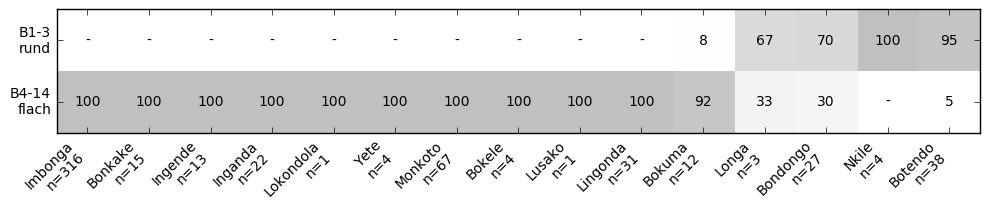

In [16]:
fig = plt.figure()
fig.set_size_inches(10, 10)

# plt.figure()
ax = plt.gca()
im = ax.imshow(df_perc, interpolation='nearest', cmap='Greys', alpha=.25)

#plt.ylabel('Stilgruppen')
plt.xlabel('')
plt.yticks(range(len(df_perc.index)), df_perc.index)
plt.xticks(range(len(df_perc.columns)), df_perc.columns, rotation = 45, ha = 'right')

for (i, j), z in np.ndenumerate(df_label):
    plt.text(j, i, z, ha='center', va='center')

#plt.axhline(3.5, color='black')

#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size=0.2, pad=0.2)
#cbar = plt.colorbar(im, cax=cax)
#cbar.set_label('Anteil (Prozent)')

plt.tight_layout()

plt.savefig('../output/figs/4-2-1_Wotzka1995_StilGr-Bodentypen.pdf', bbox_inches='tight')
plt.show()